# Анализ продаж компьютерных игр

Для анализа продаж компьютерных игр доступен файл с данными о продажах игр, оценках пользователей и экспертов, жанрах и игровых платформах. Необходимо выявить определяющие успешность игры закономерности, позволяющие сделать ставку на потенциально популярный продукт, чтобы спланировать рекламные кампании.

**Этапы исследования:**
1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Статистический анализ данных

## Обзор данных 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from matplotlib import rcParams

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Расшифровка аббревиатур столбца Rating  
«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет  
«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет    
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет    
«AO» («Adults Only 18+») — «Только для взрослых»   
«RP» («Rating Pending») — «Рейтинг ожидается»   
«K-A» — Для детей(до 1998 года) 

**Вывод по разделу: Исходный датафрейм состоит из 10 столбцов и 16715 строк, сразу видно, что в данных присутствует много пропусков. Для анализа представлена информация с 1980 года по 2016**

## Предобработка данных

### Изменение регистра стобцов

Приведем названия столбцов к нижнему регистру

In [7]:
games.columns = games.columns.str.lower()

In [8]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Названия столбцов приведены к нижнему регистру**

### Обработка пропусков

Проверим датафрейм на наличие пропущенных значений

In [9]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Очень много пропусков в столбцах `critic_score`, `user_score`, `rating`. Два пропуска в столбце `name`, удалим эти строки, т.к. в них совсем мало информации

In [11]:
games = games.dropna(subset = ['name']).reset_index(drop = True)

In [12]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Удалим строки оставшиеся строки с пропусками в столбце `year_of_release`, их незначительное кол-во.

In [13]:
games = games.dropna(subset = ['year_of_release']).reset_index(drop = True)

In [14]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**Удалены строки с пропусками в столбце year_of_release и name. Их незначительное кол-во. В последних трех столбцах очень много пропущенных значений, которые некорректно заполнять по имеющимся данным. Оставим их**

### Удаление дубликатов

Проверим датафрейм на наличие дубликатов

In [15]:
games.duplicated().sum()

0

Полных дубликатов в таблице нет

In [16]:
games[['name', 'year_of_release', 'platform']].duplicated().sum()

1

Есть один дубликат с одинаковым именем, годом выпуска и платформой игры.

In [17]:
games.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3933,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5800,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
15969,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Это игра 'Madden NFL 13' 2012 года выпуска на PS3. Эти строки отличаются только значением eu_sales. Удалим одну из строк, а значения в колонке eu_sales сложим.

In [18]:
games.loc[600, 'eu_sales'] = games.loc[600, 'eu_sales'] + 0.01

In [19]:
games = games.drop_duplicates(subset = ['name', 'platform', 'year_of_release']).reset_index(drop = True)

Проверим правильность предыдущих действий

In [20]:
games.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
3933,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5800,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


In [21]:
games[['name', 'year_of_release', 'platform']].duplicated().sum()

0

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В данных был обработан всего неявный один дубликат, явных дубликатов нет**

### Изменение типов данных

Изменим тип данных в столбце `year_of_release` на целые числа

In [23]:
games['year_of_release'] = games['year_of_release'].astype('int64')

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [25]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
1.1       2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [26]:
games['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [27]:
games['genre'].value_counts()

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

В столбце `critic_score` целые числа, но невозможно изменить тип данных на целые из-за наличия пропусков, в столбце user_score тип данных object из-за строк со значением tbd.

*TBD (To Be Determined) – английская аббревиатура, которая означает «будет определено» или «будет установлено». Она используется для указания на неопределенность или незавершенность чего-либо на данный момент.*

In [28]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16423,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16425,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16426,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16432,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


По сути tbd тоже самое, что и nan. Заменим tbd на nan и поменяем тип данных столбца.

In [29]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [30]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [31]:
games['user_score'] = games['user_score'].astype('float64')

In [32]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [33]:
games['rating'] = games['rating'].fillna('Empty')

In [34]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Empty
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Empty


**В столбце year_of_release тип данных был изменен на int, в столбце user_score tbd заменили на nan и поменяли тип данных столбца на float. В столбце rating пропуски nan заполнила заглушкой Empty**

### Добавление нового столбца

In [35]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Empty
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Empty


Добавим столбец с суммарными продажами по всем регионам

In [36]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [37]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Empty,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Empty,31.38


**Добавлен столбец с суммарными продажами по всем регионам**

**Вывод по разделу: В результате предобработки данных названия стобцов были приведены к нижнему регистру, были заполнены пропуски, где это возможно, изменены типы данных и добавлен новый столбец с суммарными продажами по всем регионам. В последних трех столбцах присутствует очень много пропусков. Пропуски в столбцах с оценками могли появиться из-за того, что игра вообще не была оценена, а в столбце с рейтингом из за того, что не всем играм присваевается возрастная категория. Ассоциация ESRB определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию в США и Канаде**

## Исследовательский анализ данных

### Распределение выпущенных игр по годам

Посмтроим на распределение выпущенных игр по годам

In [39]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

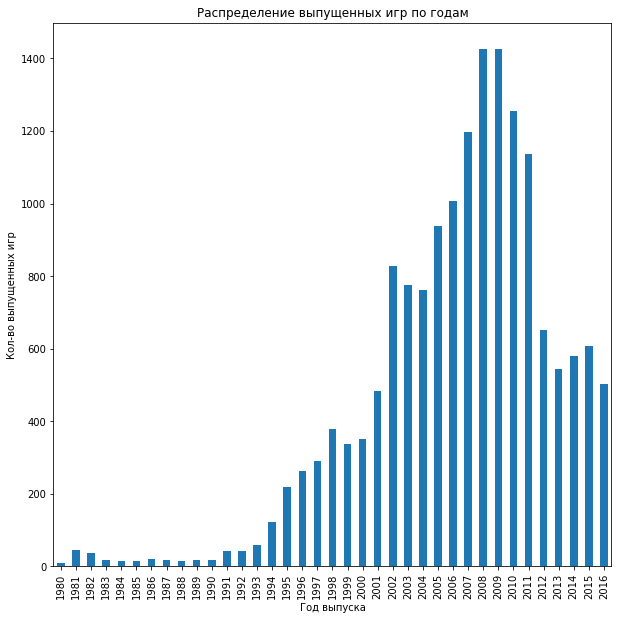

In [40]:
games.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (10,10));
plt.title('Распределение выпущенных игр по годам');
plt.xlabel('Год выпуска');
plt.ylabel('Кол-во выпущенных игр');

**Исследование охватило период с 1980 года по 2016 год. До 1995 года выпускалось довольно мало игр, далее их количество начало расти. Пик по количеству выпущенных игр пришелся на 2008, 2009 год, за год выпустили более 1400 игр.**

### Выбор лидирующих платформ по продажам

Выделим топ-10 самых прибыльных платформ за все время

In [41]:
games.groupby(['platform'])['sum_sales'].sum().sort_values(ascending = False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sum_sales, dtype: float64

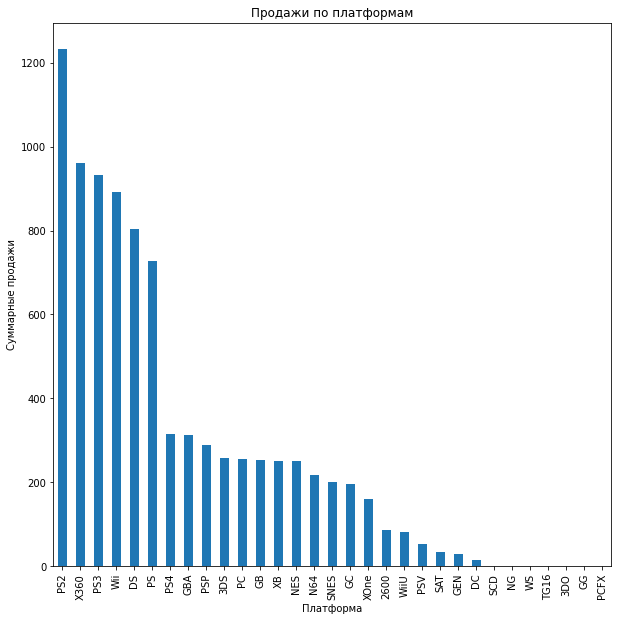

In [42]:
games.groupby(['platform'])['sum_sales'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,10));
plt.title('Продажи по платформам');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи');

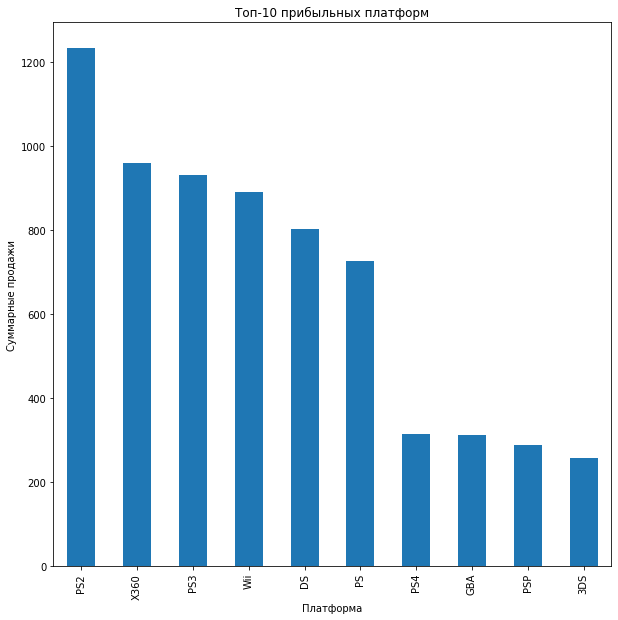

In [43]:
games.groupby(['platform'])['sum_sales'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (10,10));
plt.title('Топ-10 прибыльных платформ');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи');

**Первое место в топе по продажам занимает приставка PS2, второе X360, третье PS3, а последнее 3DS. На рейтинг сильно влияет как давно вышла приставка, какие-то приставки совсем новые и на них не успели продать много игр**

###  Распределение по годам для наиболее прибыльных платформ

Для топ-10 платформ построим распределение продаж по годам

In [44]:
top10 = list(games.groupby(['platform'])['sum_sales'].sum().sort_values(ascending = False).head(10).index)

In [45]:
top10

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [46]:
games.loc[games['platform'].isin(top10)].pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


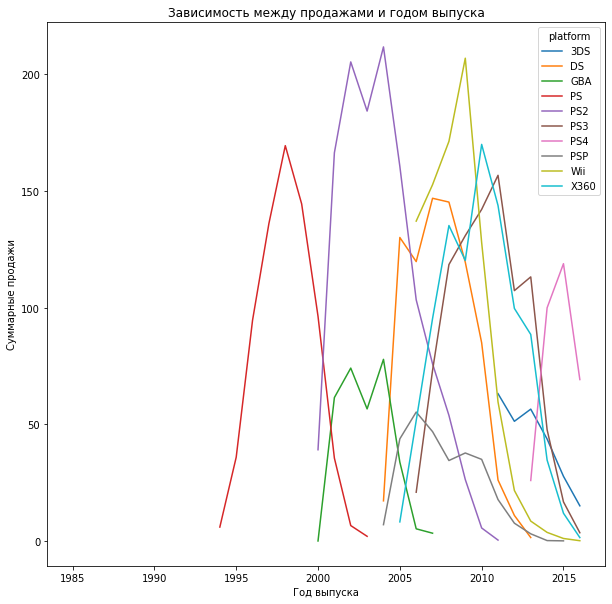

In [47]:
games.loc[games['platform'].isin(top10)].pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(figsize = (10,10));
plt.title('Зависимость между продажами и годом выпуска');
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');

Для платформ, которые не вошли в топ-10 по суммарным доходам от продажам игр, построим отдельный график

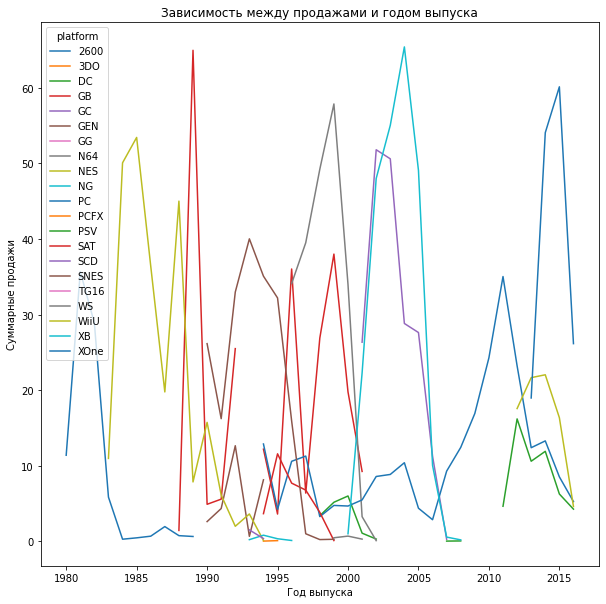

In [48]:
games.loc[~games['platform'].isin(top10)].pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(figsize = (10,10));
plt.title('Зависимость между продажами и годом выпуска');
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');

По таким графикам сложно сделать какие либо выводы. Построим для 5 самых прибыльных приставок отдельные графики.

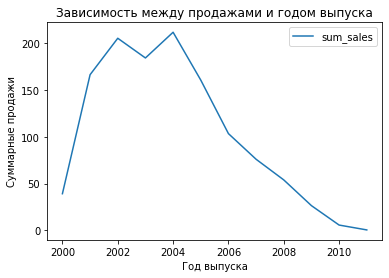

In [49]:
games.query('platform == "PS2"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot();
plt.title('Зависимость между продажами и годом выпуска');
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');

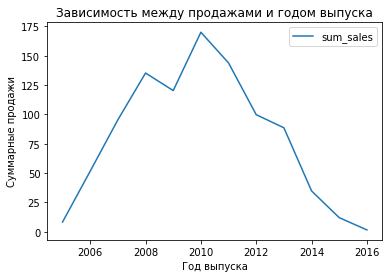

In [50]:
games.query('platform == "X360"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot();
plt.title('Зависимость между продажами и годом выпуска');
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');

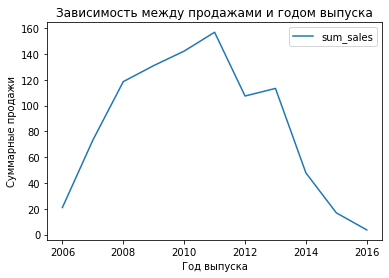

In [51]:
games.query('platform == "PS3"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot();
plt.title('Зависимость между продажами и годом выпуска');
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');

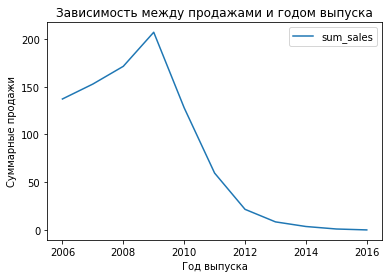

In [52]:
games.query('platform == "Wii"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot();
plt.title('Зависимость между продажами и годом выпуска');
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');

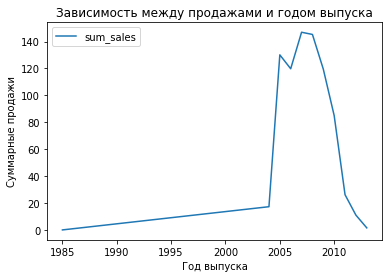

In [53]:
games.query('platform == "DS"').pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot();
plt.title('Зависимость между продажами и годом выпуска');
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');

Далее будем рассматривать период с 2013 по 2016 год. 

In [55]:
games_new = games.query('year_of_release >= 2013 and year_of_release <= 2016')

**В среднем срок жизни платформы 7-8 лет, каждые 5 лет точно выходит новая платформа, иногда выходит по несколько в год. Исходя из графиков, можно сделать вывод, что многие платформы уже находятся на последней стадии своего жизненного цикла и не будут приносить больших продаж, поэтому мы сократили исследуемый период. Для прогнозирования продаж на 2017 год будем рассматривать период с 2013 года по 2016**

### Выбор лидирующих платформ по продажам

Найдем потенциально прибыльные платформы, с которыми можно работать в будущем

In [56]:
games_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


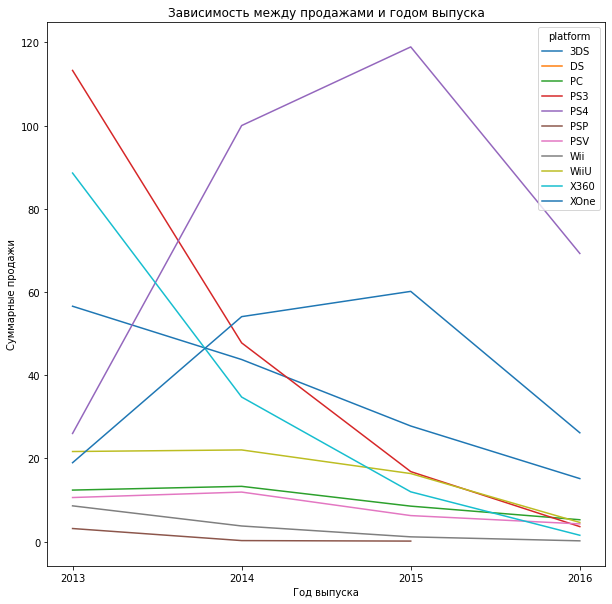

In [57]:
games_new.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(figsize = (10,10));
plt.title('Зависимость между продажами и годом выпуска');
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи');
plt.xticks(range(2013,2017));

In [58]:
games_new.groupby(['platform'])['sum_sales'].sum().sort_values(ascending = False).head(10)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: sum_sales, dtype: float64

**Можно выделить платформы PS4 и XOne, они самые новые, имеют высокую популярность на выходе и продажи игр на них растут. Продажи на остальных платформах падают, в связи с тем, что они вышли больше 5 лет назад и уже прошли свой пик продаж. Также есть две более менее новые приставки WiiU и PSV, но судя по графику прибыль от них будет только падать, тк они не пользуются популярностью. Потенциально прибыльные платформы PS4 и XOne**

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

In [59]:
games_new.groupby(['platform'])['sum_sales'].sum()

platform
3DS     143.25
DS        1.54
PC       39.43
PS3     181.43
PS4     314.14
PSP       3.50
PSV      32.99
Wii      13.66
WiiU     64.63
X360    136.80
XOne    159.32
Name: sum_sales, dtype: float64

In [60]:
games_new.groupby(['platform'])['sum_sales'].median().sort_values()

platform
PSP     0.020
PSV     0.040
PC      0.080
3DS     0.090
PS3     0.150
DS      0.150
Wii     0.180
PS4     0.200
WiiU    0.200
XOne    0.220
X360    0.265
Name: sum_sales, dtype: float64

In [61]:
games_new.groupby(['platform'])['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


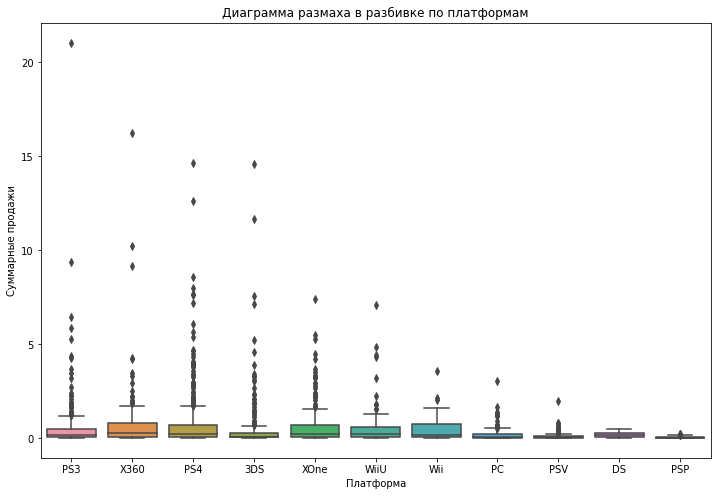

In [62]:
rcParams['figure.figsize'] = 12, 8
sns.boxplot(data = games_new, y = 'sum_sales', x = 'platform');
plt.title('Диаграмма размаха в разбивке по платформам');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи');

Из-за большого кол-ва выбросов на данной диаграмме совсем не видно медианe, построим дополнительную диаграмму с измененным масштабом по оси y.

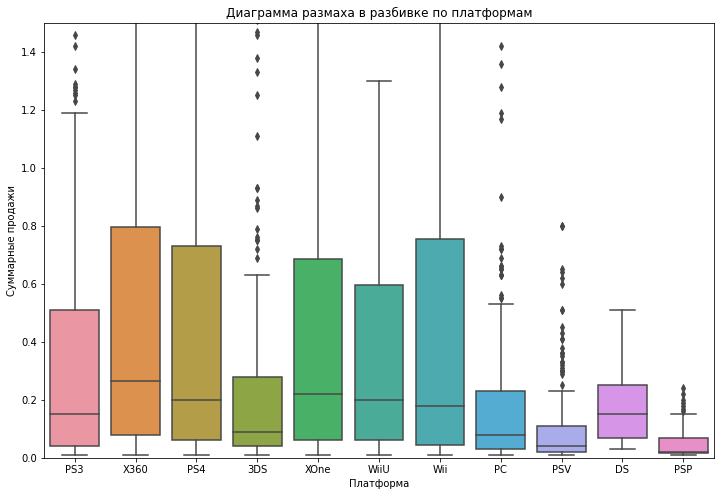

In [63]:
rcParams['figure.figsize'] = 12, 8
sns.boxplot(data = games_new, y = 'sum_sales', x = 'platform');
plt.ylim(0, 1.5);
plt.title('Диаграмма размаха в разбивке по платформам');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи');

**На диаграмме размаха видно очень много выбросов. Самая большая медиана и размах у платформы XBox, далее идут PS и Wii**

### Влияние отзывов пользователей и критиков на продажи

Посмотрим влияют ли отзывы критиков и пользователей на продажи игр

In [64]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Empty,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Выделим топ-5 самых прибыльных платформ для дальнейшей работы

In [65]:
top5 = list(games_new.groupby(['platform'])['sum_sales'].sum().sort_values(ascending = False).head(5).index)
top5

['PS4', 'PS3', 'XOne', '3DS', 'X360']

In [66]:
def corr_critic_score(platforma):
    return games_new.loc[games_new['platform']== platforma]['sum_sales'].corr(games_new.loc[games_new['platform']== platforma]['critic_score'])

In [67]:
def corr_user_score(platforma):
    return games_new.loc[games_new['platform']== platforma]['sum_sales'].corr(games_new.loc[games_new['platform']== platforma]['user_score'])

In [68]:
def scatter_critic_score(platforma):
    return games_new.loc[games_new['platform'] == platforma].plot.scatter('sum_sales','critic_score'),\
        plt.title(f'Диаграмма рассеяния {i}'), plt.xlabel('Суммарные продажи'), plt.ylabel('Оценка критиков')


In [69]:
def scatter_user_score(platforma):
    return games_new.loc[games_new['platform'] == platforma].plot.scatter('sum_sales','user_score'),\
        plt.title(f'Диаграмма рассеяния {i}'), plt.xlabel('Суммарные продажи'), plt.ylabel('Оценка пользователей')

In [70]:
for i in top5:
    print(f'Корреляция между отзывами критиков и продажами для {i}: {corr_critic_score(i)}')

Корреляция между отзывами критиков и продажами для PS4: 0.406567902061781
Корреляция между отзывами критиков и продажами для PS3: 0.3342853393371919
Корреляция между отзывами критиков и продажами для XOne: 0.41699832800840175
Корреляция между отзывами критиков и продажами для 3DS: 0.35705661422881035
Корреляция между отзывами критиков и продажами для X360: 0.3503445460228664


In [71]:
for i in top5:
    print(f'Корреляция между отзывами пользователей и продажами для {i}: {corr_user_score(i)}')

Корреляция между отзывами пользователей и продажами для PS4: -0.031957110204556376
Корреляция между отзывами пользователей и продажами для PS3: 0.0023944027357566925
Корреляция между отзывами пользователей и продажами для XOne: -0.06892505328279412
Корреляция между отзывами пользователей и продажами для 3DS: 0.24150411773563016
Корреляция между отзывами пользователей и продажами для X360: -0.011742185147181342


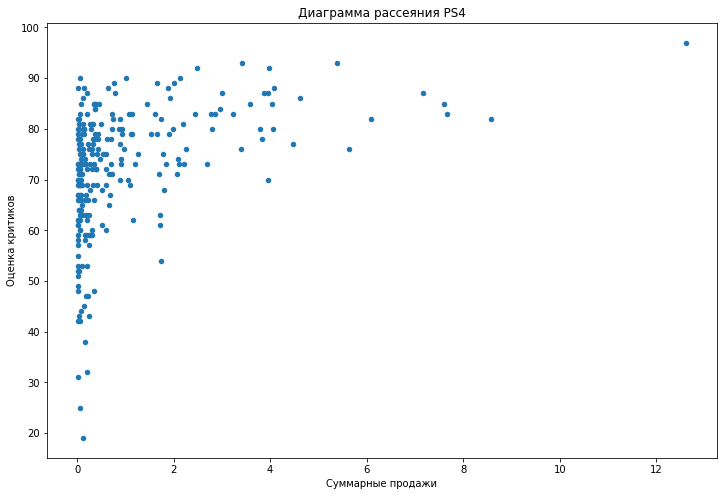

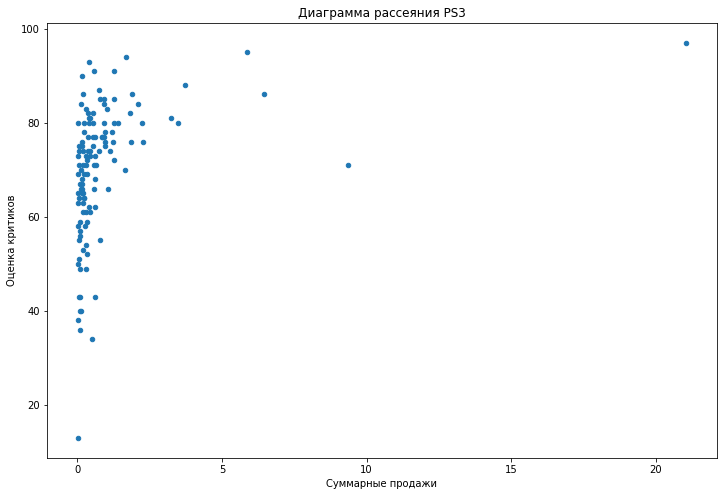

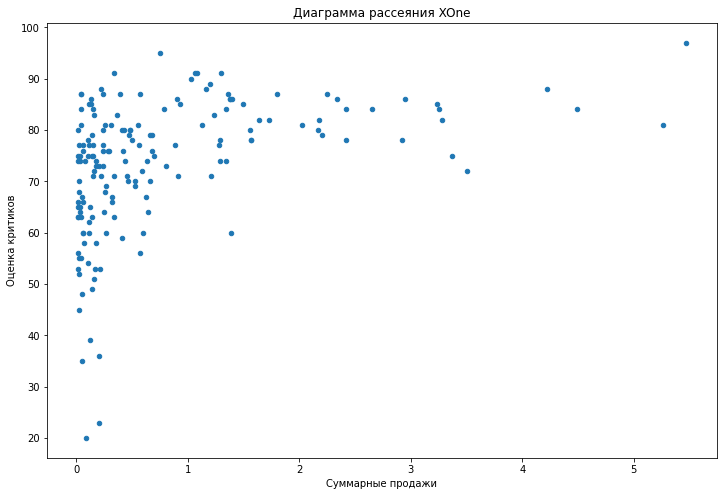

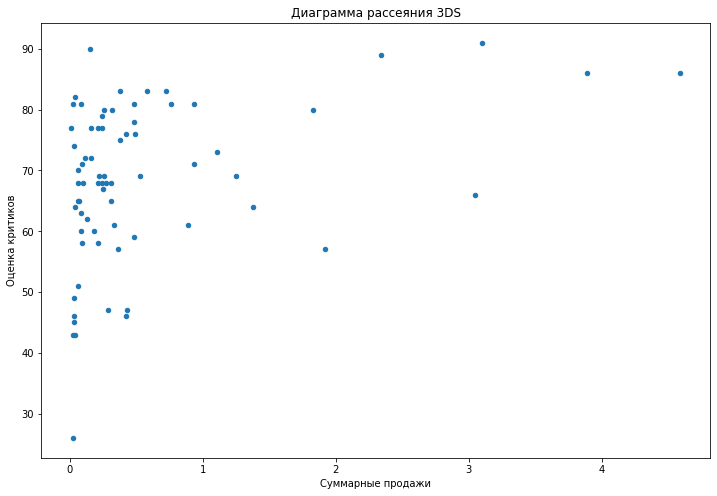

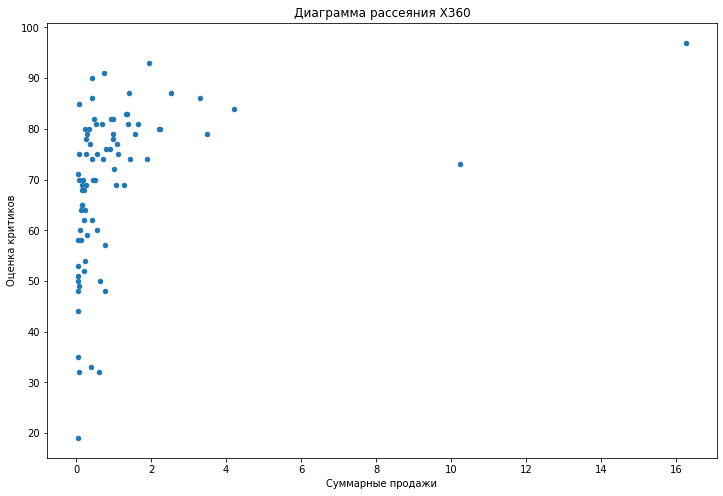

In [72]:
for i in top5:
    scatter_critic_score(i)

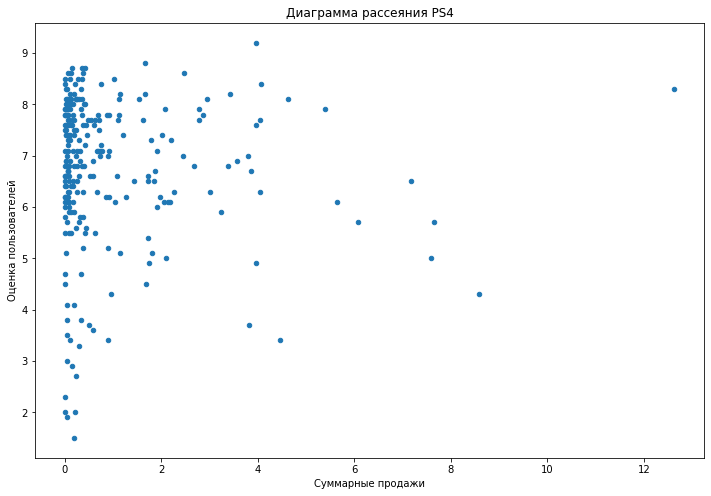

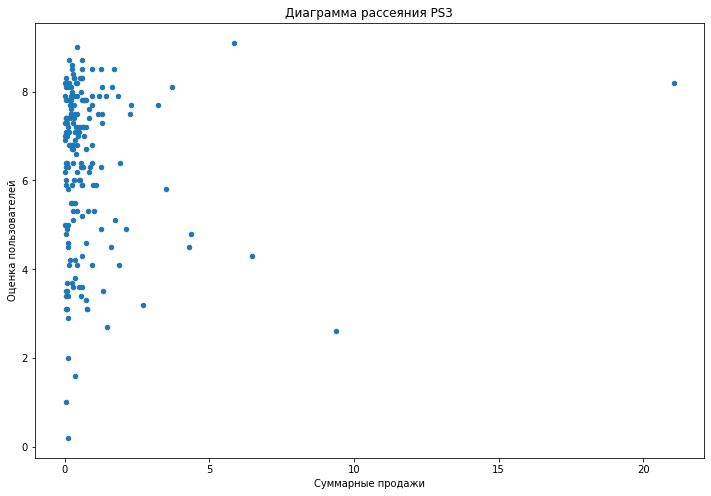

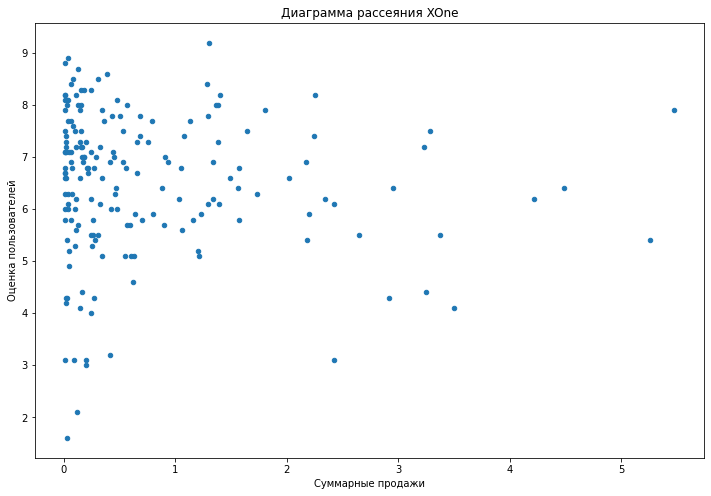

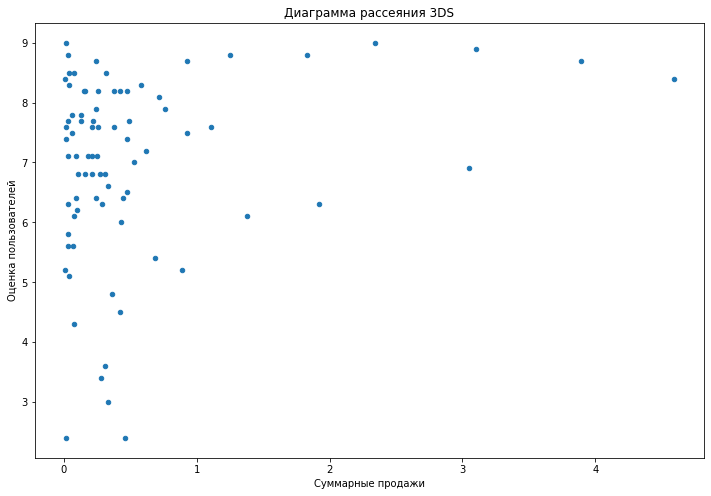

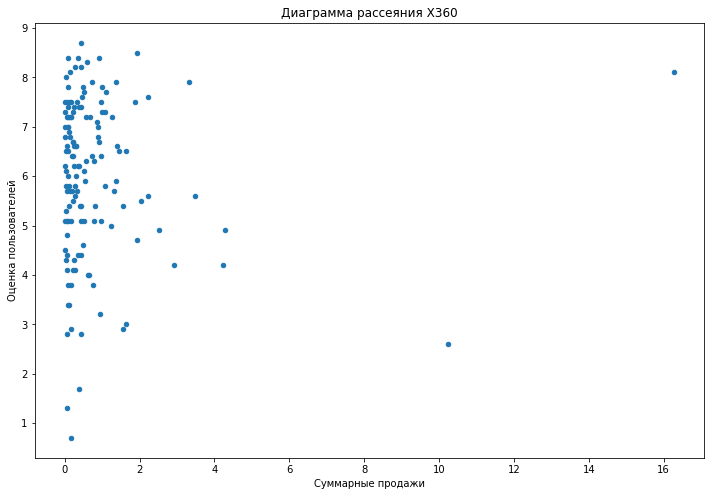

In [73]:
for i in top5:
    scatter_user_score(i)

**Между оценкой пользователя и продажами нет линейной связи, а между оценкой критиков и продажами есть слабая положительная
линейная связь. Оценка критиков может быть опубликована в сети и на основании нее пользователи будут совершать/не совершать покупки**

### Распределение игр по жанрам

Рассмотрим распределение игр по жанрам

In [74]:
games_new.groupby('genre')['sum_sales'].count().sort_values()

genre
Puzzle           17
Strategy         56
Simulation       62
Platform         74
Fighting         80
Racing           85
Misc            155
Shooter         187
Sports          214
Adventure       245
Role-Playing    292
Action          766
Name: sum_sales, dtype: int64

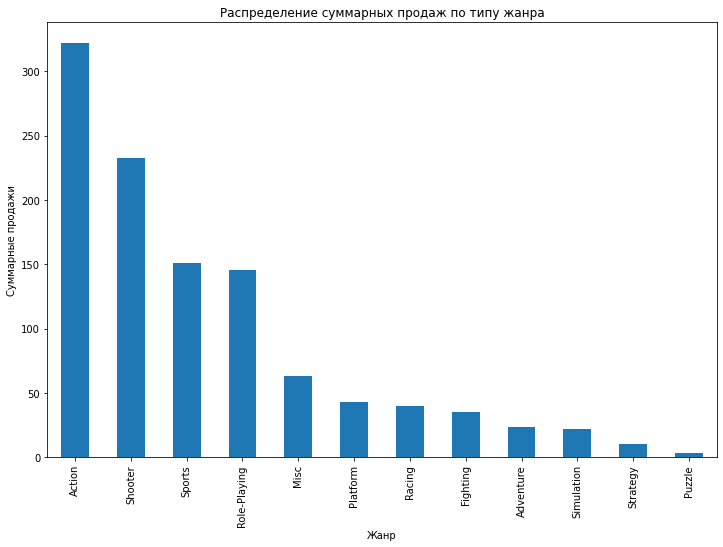

In [75]:
games_new.groupby('genre')['sum_sales'].sum().sort_values(ascending = False).plot(kind = 'bar');
plt.title('Распределение суммарных продаж по типу жанра');
plt.xlabel('Жанр');
plt.ylabel('Суммарные продажи');

Самым популярным оказался жанр action, самым непопулярным puzzle, причем action сильно отрывается от остальных. Теперь посмотрим на медиану продаж по жанрам

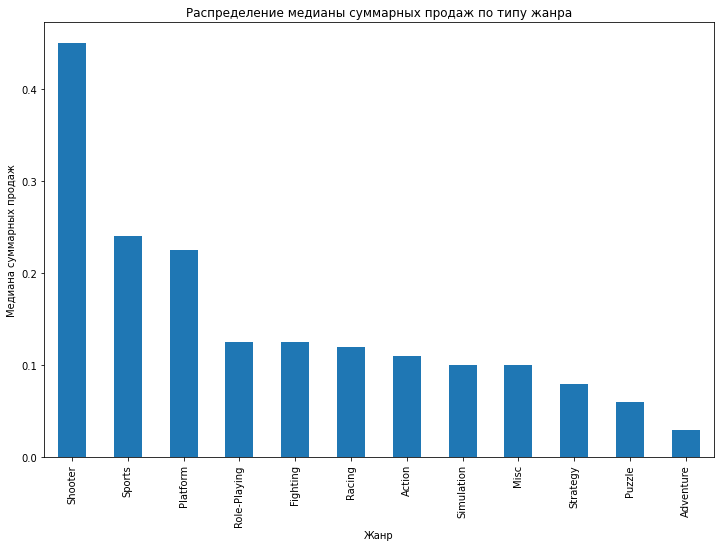

In [76]:
games_new.groupby('genre')['sum_sales'].median().sort_values(ascending = False).plot(kind = 'bar');
plt.title('Распределение медианы суммарных продаж по типу жанра');
plt.xlabel('Жанр');
plt.ylabel('Медиана суммарных продаж');

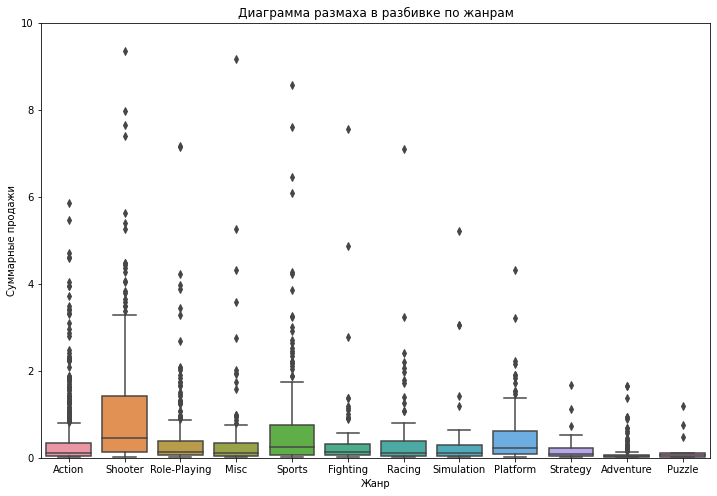

In [77]:
sns.boxplot(data = games_new, y = 'sum_sales', x = 'genre');
plt.ylim(0, 10);
plt.title('Диаграмма размаха в разбивке по жанрам');
plt.xlabel('Жанр');
plt.ylabel('Суммарные продажи');

**Можно заметить, что по медиане продаж на первое место выходит жанр Shooter, а Action даже не входит в пятерку лидеров из-за того, что имеет много выбросов. Скорее всего какие то отдельные игры в этом жанре имели невероятную популярность**

**Вывод по разделу: Т.к. нам надо сделать прогноз на 2017 год, возьмем данные с 2013 по 2016 год. Платформа остается актуальной около 7-8 лет, со временем продажи идут на спад, в связи с выходом новой приставки. Каждые 5 лет точно выходит новая приставка, иногда в один год выходит сразу несколько приставок. Можно выделить платформы PS и XBox, старые модели лидирует по выручке за последние пару лет, продажи по новым растут на данный момент. На доход от игры может повлиять рейтинг критиков, особенно, если он будет в открытом доступе. Самым популярным по суммарным продажам оказался жанр Action, а по медиане Shooter. Самый непопулярный жанр игры Puzzle** 

## Портрет пользователя каждого региона

Составим портрет пользователя для каждого региона (NA, EA, JP)

### Самые популярные платформы (топ-5) по регионам


Выделим топ-5 самых прибыльных платформ

In [78]:
games_new.groupby('platform')['na_sales'].sum().sort_values(ascending = False)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
WiiU     29.21
PC       11.11
Wii       6.56
PSV       5.04
DS        0.57
PSP       0.00
Name: na_sales, dtype: float64

Топ-5 платформ по продажам игр в Северной Америке:  
1.PS4  
2.XOne  
3.X360  
4.PS3  
5.3DS   
PS4 занимает 25% от всех продаж, 2 и 3 место делит платформа XBox.

In [80]:
games_new.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Wii       5.93
DS        0.85
PSP       0.17
Name: eu_sales, dtype: float64

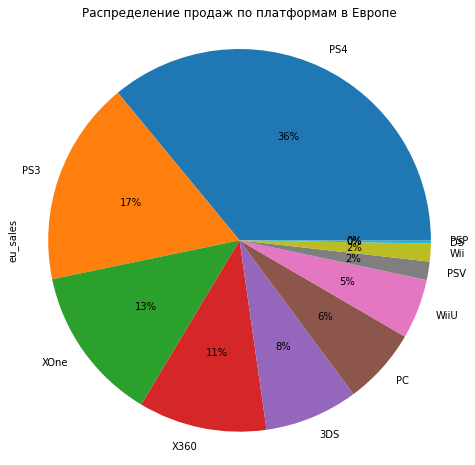

In [81]:
games_new.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.0f%%', radius=1.1);
plt.title('Распределение продаж по платформам в Европе');

Топ-5 платформ по продажам игр в Европе:  
1.PS4  
2.PS3  
3.XOne 
4.X360   
5.3DS  
Продажи PS занимают чуть ли не половину объема продаж всех игр.

In [82]:
games_new.groupby('platform')['jp_sales'].sum().sort_values(ascending = False) 

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
PSP      3.29
X360     0.51
XOne     0.34
Wii      0.05
DS       0.00
PC       0.00
Name: jp_sales, dtype: float64

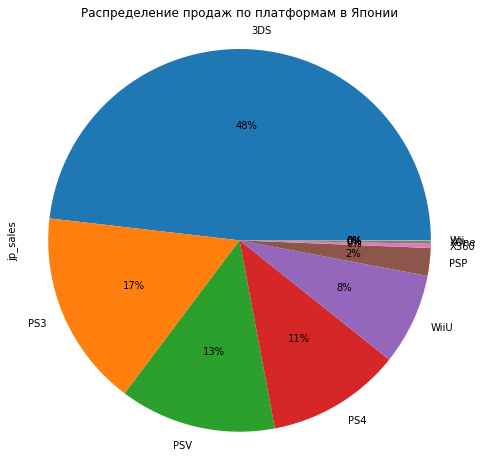

In [83]:
games_new.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.0f%%', radius=1.1);
plt.title('Распределение продаж по платформам в Японии');

Топ-5 платформ по продажам игр в Японии:  
1.3DS  
2.PS3  
3.PSV   
4.PS4  
5.WiiU   
Можно заметить, что вкусы японцев сильно отличаются от остальных. Практически половина проданных игр на 3DS, а игры платформы Xbox совсем не продаются. Неудивительно, ведь nintendo 3DS японская разработка

**В Америке и Европе за последние годы большинство игр продается на платформу PS4, в Японии на 3DS**

### Самые популярные жанры (топ-5)

Теперь рассмотрим самые прибыльные игры по жанрам

In [84]:
games_new.groupby('genre')['na_sales'].sum().sort_values(ascending = False)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
Name: na_sales, dtype: float64

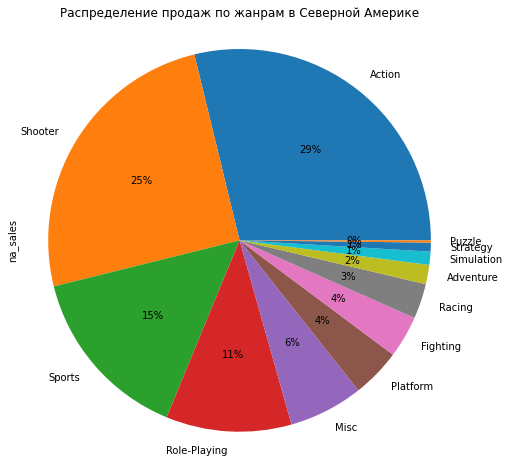

In [85]:
games_new.groupby('genre')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.0f%%', radius=1.1);
plt.title('Распределение продаж по жанрам в Северной Америке');

Топ-5 популярных жанров в Северной Америке:  
1.Action  
2.Shooter  
3.Sports  
4.Role-Playing  
5.Misc  
Самую большую популярность имеет жанр Action, самую маленькую Puzzle

In [86]:
games_new.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
Name: eu_sales, dtype: float64

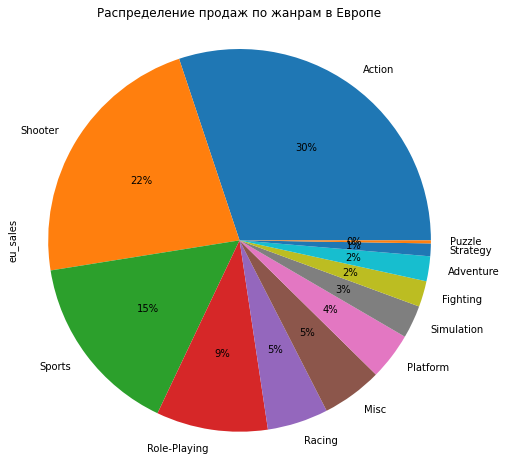

In [87]:
games_new.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.0f%%', radius=1.1);
plt.title('Распределение продаж по жанрам в Европе');

Топ 5 популярных жанров в Европе:  
1.Action  
2.Shooter  
3.Sports  
4.Role-Playing  
5.Racing  
Топ-5 самых прибыльных жанров в Северной Америке и в Европе очень похожи

In [88]:
games_new.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Adventure        5.82
Sports           5.41
Platform         4.79
Simulation       4.52
Racing           2.30
Strategy         1.77
Puzzle           1.18
Name: jp_sales, dtype: float64

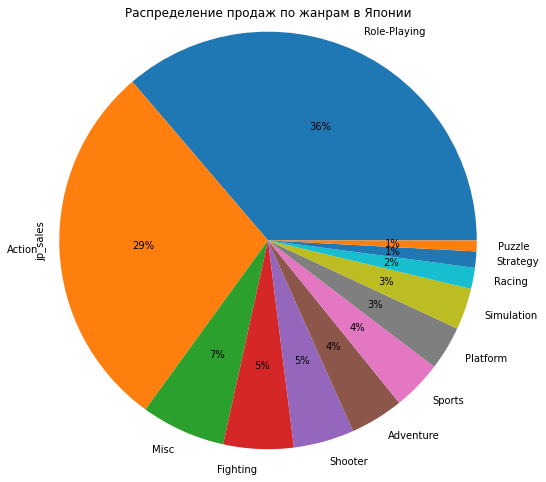

In [89]:
games_new.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.0f%%', radius=1.2);
plt.title('Распределение продаж по жанрам в Японии');

Топ-5 популярных жанров в Японии:   
1.Role-Playing    
2.Action  
3.Misc  
4.Fighting  
5.Shooter  
Жанр Role-Playing занимает 36% от общего объема проданных игр в Японии, что сильно отличается от Америки и Европы. Но жанр  Action тут тоже довольно популярен.

**Большинство Американцев предпочитает жанр action, также как и европейцы. У японцев жанр action второй по популярности, первое место занимает Role-Playing. Жанр puzzle самый непопулярный у всех**

### Влияние рейтинга ESRB на продажи в отдельном регионе

Посмотрим как влияет рейтинг ESRB на продажи в разных регионах

In [90]:
games_new.query('rating == "Empty"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Empty,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Empty,11.68
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Empty,9.18
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Empty,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16431,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Empty,0.01
16435,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Empty,0.01
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Empty,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Empty,0.01


In [91]:
games_new.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

rating
M        165.21
Empty     89.42
E         79.05
E10+      54.24
T         49.79
Name: na_sales, dtype: float64

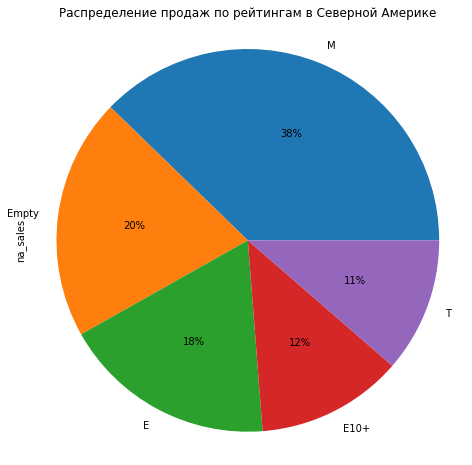

In [92]:
games_new.groupby('rating')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.0f%%', radius=1.1);
plt.title('Распределение продаж по рейтингам в Северной Америке');

In [93]:
games_new.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

rating
M        145.32
E         83.36
Empty     78.91
E10+      42.69
T         41.95
Name: eu_sales, dtype: float64

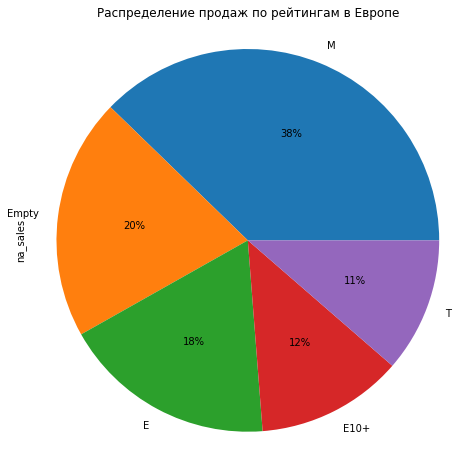

In [94]:
games_new.groupby('rating')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.0f%%', radius=1.1);
plt.title('Распределение продаж по рейтингам в Европе');

In [95]:
games_new.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

rating
Empty    85.05
T        20.59
E        15.14
M        14.11
E10+      5.89
Name: jp_sales, dtype: float64

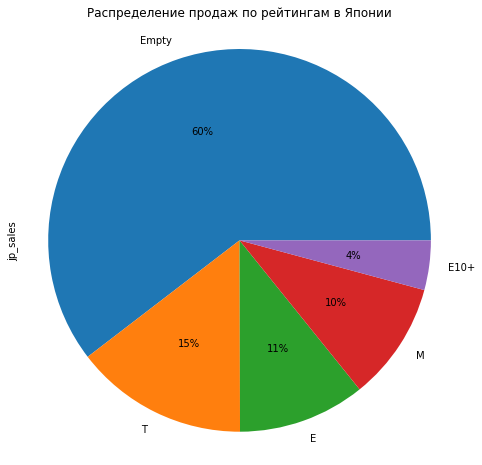

In [96]:
games_new.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.0f%%', radius=1.1);
plt.title('Распределение продаж по рейтингам в Японии');

**В Америке и Европе больше всего продаются игры с рейтингом М - Для взрослых. В Японии в столбце с рейтингом присутствует очень много пропусков, скорее всего связанных с тем, что ESRB используется для маркировки игр для США и Канады**

In [97]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Empty,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


**Вывод по разделу: Портрет пользователя Северной Америки чем-то схожи, большинство Американцев предпочитает жанр action, также как и европейцы. У японцев жанр action второй по популярности, первое место занимает Role-Playing. Жанр puzzle самый непопулярный у всех. У американцев продажи игр на PS4 занимает 25% от всех продаж, 2 и 3 место делит платформа XBox. В Европе продажи PS3 и PS4 занимают чуть ли не половину объема продаж всех игр. В Японии практически половина проданных игр на платформе их собственной разработки 3DS, а игры на XBox практически не продаются. В Америке и Европе больше всего продаются игры с рейтингом М - Для взрослых. В Японии в столбце с рейтингом присутствует очень много пропусков, скорее всего связанных с тем, что ESRB используется для маркировки игр для США и Канады**

## Статистический анализ данных

### Проверка гипотез

Проверка гипотез начинается с формулировки нулевой гипотезы. В дополнение к нулевой гипотезе формулируется альтернативная гипотеза. Это утверждение, которое принимается верным, если отвергается нулевая.
Чтобы ответить на являются ли средние пользовательские рейтинги платформ Xbox One и PC одинаковыми, проверим следующую двустороннюю гипотезу.  
Нулевая гипотеза: Средний пользовательский рейтинг платформы Xbox One = Средний пользовательский рейтинг платформы PC  
Альтернативная гипотеза: Средний пользовательский рейтинг платформы Xbox One ≠ Средний пользовательский рейтинг платформы PC
Т.к. мы оцениваем разные платформы, воспользуемся методом st.ttest_ind. Выберем уровень значимости 0,05  

In [98]:
alpha = 0.05
results = st.ttest_ind(games_new.query('platform == "XOne"')['user_score'].dropna(), games_new.query('platform == "PC"')['user_score'].dropna())

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [99]:
games_new.query('platform == "XOne"')['user_score'].dropna().mean()

6.521428571428572

In [100]:
games_new.query('platform == "PC"')['user_score'].dropna().mean()

6.2696774193548395

Т.к. p-value > alpha, у нас нет оснований нулевую отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC на уровне значимости 5%.

Проверим гипотезу являются ли средние пользовательские рейтинги жанров Action и Sports разными. Выберем метод аналогично предыдущему.
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action = Средние пользовательские рейтинги жанров Sports   
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action ≠ Средние пользовательские рейтинги жанров Sports

In [101]:
alpha = 0.05
results = st.ttest_ind(games_new.query('genre == "Action"')['user_score'].dropna(), games_new.query('genre == "Sports"')['user_score'].dropna())

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [102]:
games_new.query('genre == "Action"')['user_score'].dropna().mean()

6.837532133676092

In [103]:
games_new.query('genre == "Sports"')['user_score'].dropna().mean()

5.238124999999999

Т.к. p-value < alpha, у нас есть основания отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports на уровне значимости 5%.

**Вывод по разделу: Проверка гипотез начинается с формулировки нулевой гипотезы. В дополнение к нулевой гипотезе формулируется альтернативная гипотеза. Это утверждение, которое принимается верным, если отвергается нулевая. В результате проверки гипотез мы получили основание отвергнуть гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports на уровне значимости 5% и не отвергать гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC на уровне значимости 5%. При проверке двусторонних гипотез использовался st.ttest_ind, т.к. мы оцениваем разные платформы.**


## Общий вывод

На первом этапе были изучены исходные данные. Проблемы были с большим кол-вом пропусков и типом данных столбцов, из-за чего невозможно было бы проводить вычисления. Тип данных удалось поменять, какие-то пропуски были заполнены, но все равно довольно много осталось. 
Исходными данными был датафрейм с данными с 1980 года по 2016 год. До 1995 года выпускалось довольно мало игр, далее их количество начало расти. Пик по количеству выпущенных игр пришелся на 2008, 2009 год. Первое место в топе по суммарным продажам занимает приставка PS2, последнее 3DS. Также на продажи влияет как давно вышла приставка, какие-то приставки совсем новые и на них не успели продать много игр. Платформа актуальна около 7-8 лет, со временем продажи игр падают. Иногда новые приставки выходят по несколько в год, а иногда перерыв может достигать 5 лет. Нашей главной целью было проанализировать данные, которые помогут построить прогноз на 2017 год, поэтому для анализа оставила данные с 2013 по 2016 год.
Потенциально прибыльные приставки, продажи которых растут PS4 и XOne, они самые новые, имеют высокую популярность на выходе. Остальные уже спокойно доживают свой срок службы и ждать от них грандиозных продаж не стоит. В целом приставки PS и Xbox выделяются на фоне остальных, они хорошо продавались в прошлом и скорее всего также хорошо будут продаваться в будущем. На доход от игры может повлиять рейтинг критиков, особенно, если он будет в открытом доступе. Самым популярным  среди всех пользоваталей оказался жанр action, но на это повлияла высокая прибыльность отдельных игр. В тройку лидеров также вошли Shooter и Role-Playing. Самый непопулярный жанр игры Puzzle.

**Портрет пользователя из Северной Америки:**    
Топ-5 платформ по продажам игр в Северной Америке:   
1.PS4, 2.XOne, 3.X360, 4.PS3, 5.3DS 
Топ-5 популярных жанров в Северной Америке:  
1.Action, 2.Shooter, 3.Sports, 4.Role-Playing, 5.Misc  
**Портрет пользователя из Европы:**  
Топ-5 платформ по продажам игр в Европе:  
1.PS4, 2.PS3, 3.XOne, 4.X360, 5.3DS  
Топ 5 популярных жанров в Европе:  
1.Action, 2.Shooter, 3.Sports, 4.Role-Playing, 5.Racing  
**Портрет пользователя из Японии:**  
Топ-5 платформ по продажам игр в Японии:  
1.3DS, 2.PS3, 3.PSV, 4.PS4, 5.WiiU  
Топ-5 популярных жанров в Японии:  
1.Role-Playing, 2.Action, 3.Misc, 4.Fighting, 5.Shooter    
Большинство Американцев предпочитает жанр Action и Shooter, также как и европейцы. У японцев жанр Action второй по популярности, первое место занимает Role-Playing. Жанр Puzzle самый непопулярный у всех. У американцев PS4 занимает 25% от всех продаж, 2 и 3 место делит платформа XBox. В Европе продажи PS3 и PS4 занимают чуть ли не половину объема продаж всех игр. В Японии почти половина проданных игр на платформе их собственной разработки 3DS, а игры на XBox практически не продаются. Вкусы японцев и американцев/европейцев сильно отличаются. В Америке и Европе самым популярным является рейтинг М - Для взрослых.  У японцев в данных с рейтингом встречается много пропусков, это может быть связано с тем, что в их стране не определяется рейтинг ESRB.
После проверки гипотез мы получили основание отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые и не отвергать гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC на уровне значимости 5%.  
**В 2017 году прибыльнее всего будут приставки PS4 и XOne с жанром игры Action и Shooter, поэтому магазину стоит сделать ставки именно на них.Также стоит обращать внимание на оцкенки критиков, они может повлиять на прибыльность игры**